In [1]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [2]:

march=pd.read_csv('01_PREPROCESSED_MARCH.csv')

In [3]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','dos','say']

In [4]:
for i in range(0,2452):
    march['clean_tweet'][i]= ''.join([i for i in march['clean_tweet'][i] if not i.isdigit()])
    march['clean_tweet'][i]=march['clean_tweet'][i].lower()
    march['clean_tweet'][i]=nfx.remove_custom_words(march['clean_tweet'][i],custom_words)

In [5]:
march['tokenized_Tweet']=np.nan

In [6]:
def tokenizing_march(text,i=0):
    text=tb(text)
    token_text=text.words
    token_text
    march['tokenized_Tweet'][i]=token_text

In [7]:
for i in range(0,2452):
    text=march['clean_tweet'][i]
    tokenizing_march(text,i)

In [8]:
march['filteredToken']=np.nan

In [9]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come','%','.','the','etc','pls','btw','let','hgd','dos','say'])

In [10]:
stop = set(stop_words)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [11]:
def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [12]:
march['filteredToken']=march['clean_tweet'].apply(clean)

In [13]:
tweets_march=march['clean_tweet']

In [14]:
tweet_list_march = tweets_march.apply(nfx.remove_stopwords)
tweet_list_march = tweet_list_march .apply(nfx.remove_special_characters)
tweet_list_march = tweet_list_march.apply(nfx.remove_punctuations)

In [15]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_custom_words(list,c_list):
        for token in list:
            for c_word in c_list:
                if( c_word==token):
                    list.remove(token)
                else:
                    pass

In [16]:
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [17]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say']

In [18]:
def Convert_list(string):
    li = list(string.split(" "))
    return li

In [19]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [20]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)

In [21]:
def my_lemma_march(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [22]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [23]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma_march(text,j)
    tweet_list_march[i]=listToString(ls)

In [24]:
for i in range(0,2452):
    ls=Convert_list(tweet_list_march[i])
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)

In [25]:
march['clean_tweet']=tweet_list_march

In [26]:
march=march.drop(2451)

In [27]:
tweet_list_march=march['clean_tweet']
ps=PorterStemmer()
for i in range(0,march.shape[0]):
    ls=march['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    march['clean_tweet'][i]=st
for i in range(0,march.shape[0]):
    ls=Convert_list(tweet_list_march[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_march[i]=listToString(ls)
march['clean_tweet']=tweet_list_march

In [28]:
march.to_csv('MarchTotalPreProcessed.csv')

In [29]:
march.head(10)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,..."
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect..."
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati..."
3,@Alhamdhulillaah Them dey do Covid test 150AED...,dey covid test privat clinic govt free stop,[],['@Alhamdhulillaah'],[],[],"[them, dey, covid, test, aed, private, clinics...","[dey, covid, test, aed, private, clinic, govt,..."
4,@YMasannat @VGDakessian Time will tell! So far...,time tell far base data million peopl vaccin w...,[],"['@YMasannat', '@VGDakessian']","['https://t.co/S8oth5jEEW', 'https://t.co/1Gjr...",[],"[time, will, tell, so, far, and, based, on, da...","[time, tell, far, based, data, million, people..."
5,Texas and Mississippi lifts ALL its COVID-19 p...,texa mississippi lift covid precaut,[],['@MailOnline'],['https://t.co/ni5ZAhDq0A'],[],"[texas, and, mississippi, lifts, all, its, cov...","[texas, mississippi, lift, covid, precaution, ..."
6,CDC Says It's Not Time to Ease Up on Covid Res...,cdc time eas covid restrict,[],[],['https://t.co/sOB844tOFi'],[],"[cdc, says, its, time, to, ease, up, on, covid...","[cdc, say, time, ease, covid, restriction]"
7,“The lymph nodes in your armpit area that we s...,lymph node armpit area mammogram larger recent...,[],"['@YMasannat', '@VGDakessian']",[],[],"[“, the, lymph, nodes, in, your, armpit, area,...","[“the, lymph, node, armpit, area, mammogram, l..."
8,Preparing New kinds of Knowledge to be Highlig...,prepar new kind knowledg highlight postcovid t...,[],[],[],['👉'],"[preparing, new, kinds, of, knowledge, to, hig...","[preparing, new, kind, knowledge, highlighted,..."
9,@Asad_Umar till date no update on Ami ‘s Covi...,till date updat ami covid vaccin auto respons ...,['#COVID19Vaccination'],"['@Asad_Umar', '@fslsltn']",[],[],"[till, date, no, update, on, ami, ‘, s, covid,...","[till, date, update, ami, ‘s, covid, vaccine, ..."


# ---K-Means---

In [30]:
data =march['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [31]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aaah,aachal,aah,aaj,aam,aameeen,aameen,aap,aapko,aarha,...,zero,zggg,zia,zilha,zimbabw,zlem,zonal,zone,zoo,zydu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


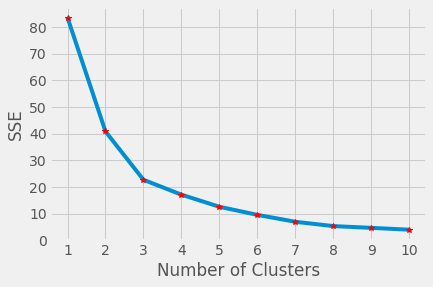

In [32]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,90,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.782552832108916
For n_clusters = 3 The average silhouette_score is : 0.5907462063591088
For n_clusters = 4 The average silhouette_score is : 0.6065066731272062
For n_clusters = 5 The average silhouette_score is : 0.5864781087619171
For n_clusters = 6 The average silhouette_score is : 0.4105538572164982
For n_clusters = 7 The average silhouette_score is : 0.45735585306459237
For n_clusters = 8 The average silhouette_score is : 0.4463124142684026
For n_clusters = 9 The average silhouette_score is : 0.4723934942543324
For n_clusters = 10 The average silhouette_score is : 0.46147255867965387


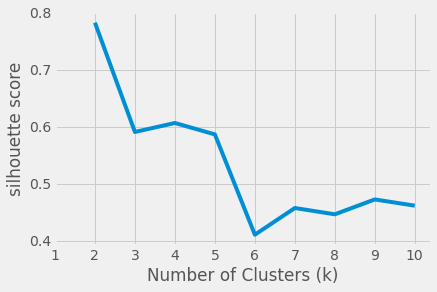

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0.5, 1.0, 'March')

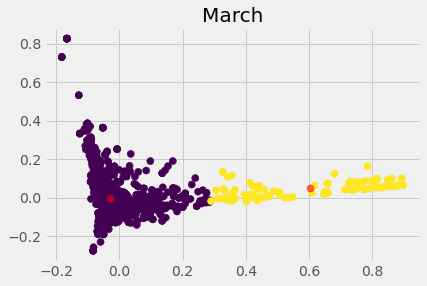

In [63]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=600,n_init=1, algorithm = 'auto',random_state=1)
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
plt.title("March",fontsize=20)
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")

In [35]:
label=kmeans.labels_
march['label']=label
march.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0


In [36]:
np.unique(march['label'])

array([0, 1])

In [37]:
march['label'].value_counts()

0    2339
1     112
Name: label, dtype: int64

In [38]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 10)

In [39]:
March_cluster=dfs

In [40]:
March_cluster[0].head(10)

,features,score
0,covid,0.054923
1,vaccin,0.046641
2,corona,0.026874
3,case,0.015734
4,india,0.015544
5,curfew,0.014458
6,peopl,0.014433
7,coronaviru,0.013344
8,posit,0.012455
9,viru,0.012084


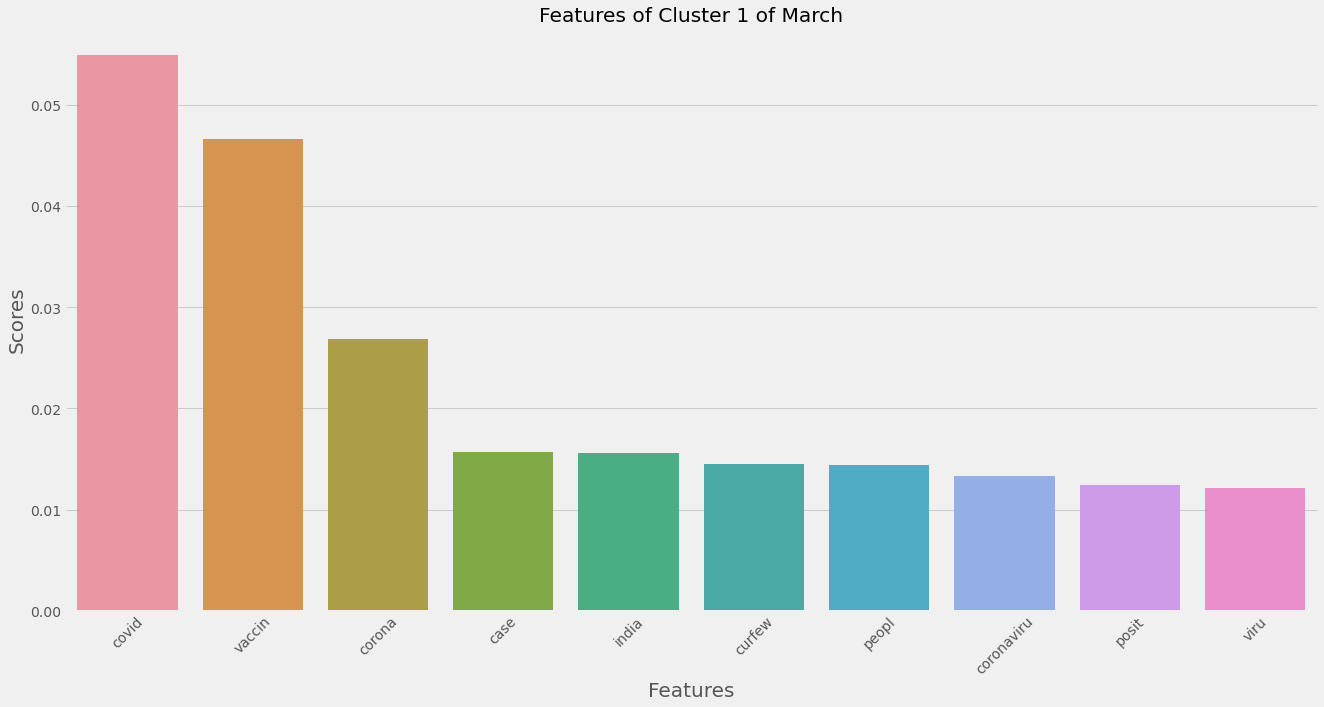

In [64]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=March_cluster[0]).set(title="Features of Cluster 1 of March")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

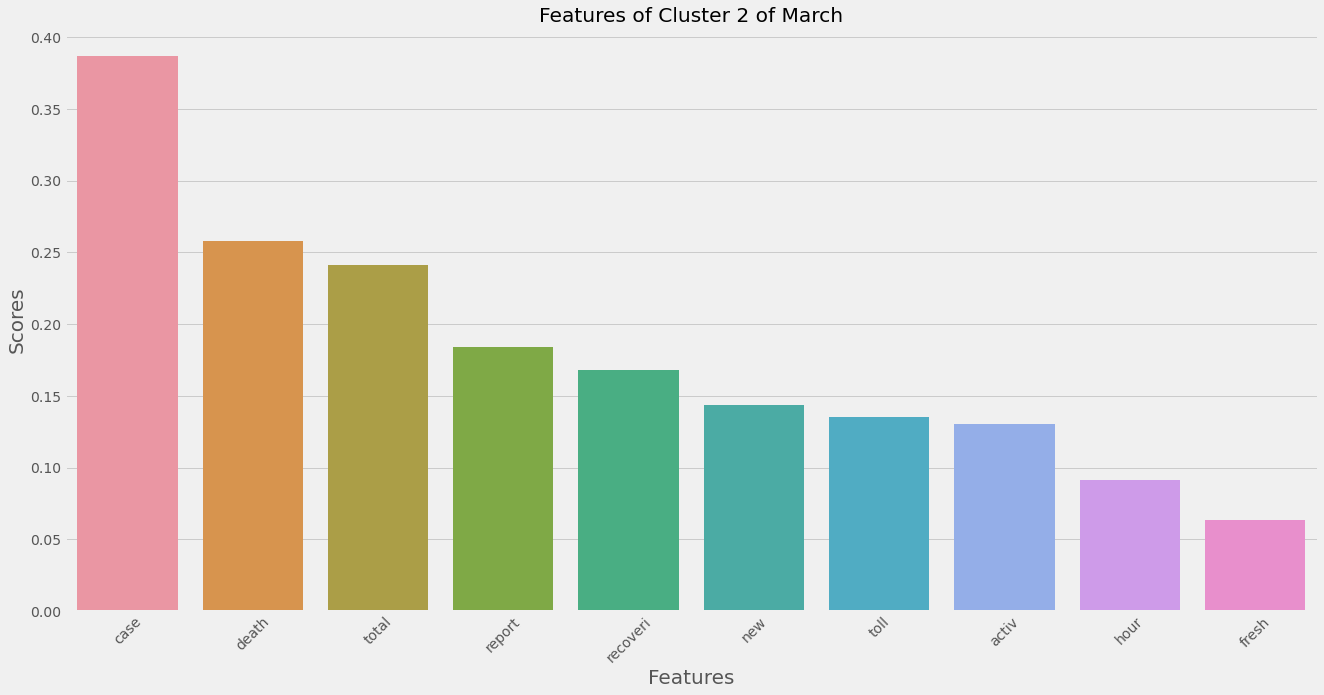

In [65]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=March_cluster[1]).set(title="Features of Cluster 2 of March")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [43]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [44]:
dfs1[0]

,features,score
0,covid,0.054923
1,vaccin,0.046641
2,corona,0.026874
3,case,0.015734
4,india,0.015544
...,...,...
4889,chandigarh,0.000000
4890,bluru,0.000000
4891,dharwad,0.000000
4892,curedrecov,0.000000


In [45]:
dfs1[1]

,features,score
0,case,0.386995
1,death,0.257631
2,total,0.240878
3,report,0.183930
4,recoveri,0.168265
...,...,...
4889,philippin,0.000000
4890,phir,0.000000
4891,phoenix,0.000000
4892,photo,0.000000


In [46]:
# K3=dfs1[2]
K1=dfs1[0]
K2=dfs1[1]

In [47]:
march_bw=pd.read_csv('MarchTopWords.csv')

In [48]:
t=march_bw[:30]


In [49]:
c1=[]
p=0
c2=[]
q=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1


In [50]:

print(p)
print(q)

28
20


In [51]:
K1.to_csv('MarchCluster1.csv')

### Tweet Grouping

In [52]:
label=kmeans.labels_
march['label']=label
march.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0


In [53]:
np.unique(march['label'])

array([0, 1])

In [54]:
march['label'].value_counts()

0    2339
1     112
Name: label, dtype: int64

In [55]:
march.to_csv('MarchClusterTweet.csv')

In [56]:
march_cluster_1=march[march.label ==0]
march_cluster_2=march[march.label ==1]

In [57]:
march_cluster_1.head(5)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
0,"Germany's Covid response ""was the envy of the ...",germani covid respons envi world daili remind ...,[],['@GoogleNews'],['https://t.co/dxbkOVjBCZ'],[],"[germanys, covid, response, was, envy, of, wor...","[germany, covid, response, envy, world, daily,...",0
1,Pfizer &amp; Moderna claim their vaccines very...,pfizer moderna claim vaccin safe effect estim ...,[],[],['https://t.co/OR1QmkkBS3'],"['🙄', '🤔', '❓', '⏩', '❓']","[pfizer, moderna, claim, their, vaccines, very...","[pfizer, moderna, claim, vaccine, safe, effect...",0
2,We recently published the predictors of hospit...,recent publish predictor hospit older adult co...,"['#COVID19', '#CoronaVirusUpdates', '#geriatri...",[],['https://t.co/GghAqZSs9t'],[],"[we, recently, published, predictors, of, hosp...","[recently, published, predictor, hospitalizati...",0
3,@Alhamdhulillaah Them dey do Covid test 150AED...,dey covid test privat clinic govt free stop,[],['@Alhamdhulillaah'],[],[],"[them, dey, covid, test, aed, private, clinics...","[dey, covid, test, aed, private, clinic, govt,...",0
4,@YMasannat @VGDakessian Time will tell! So far...,time tell far base data million peopl vaccin w...,[],"['@YMasannat', '@VGDakessian']","['https://t.co/S8oth5jEEW', 'https://t.co/1Gjr...",[],"[time, will, tell, so, far, and, based, on, da...","[time, tell, far, based, data, million, people...",0


In [58]:
march_cluster_2.head(5)

,tweet,clean_tweet,hastags,attherate,urls,emojis,tokenized_Tweet,filteredToken,label
63,"""Over 85% of new COVID-19 cases are from six s...",new covid case state india,[],[],['https://t.co/h0Jyzm4JHm'],[],"[over, of, new, covid, cases, are, six, states...","[new, covid, case, six, state, across, india]",1
81,04.02.2021 Recently #Covid_19+ve cases in Indi...,recent case india show declin trendris case to...,['#Covid_19+ve'],[],[],[],"[recently, cases, in, india, is, showing, decl...","[recently, case, india, showing, declining, tr...",1
98,06.02.2021 Recently #Covid_19+ve cases in Indi...,recent case india show declin trendbut rise ca...,['#Covid_19+ve'],[],[],[],"[recently, cases, in, india, is, showing, decl...","[recently, case, india, showing, declining, tr...",1
102,Karnataka had a total of 580 fresh #Covid_19 c...,karnataka total fresh case death saturday beng...,['#Covid_19'],"['@ChitraSundaram7', '@scooban', '@Amit_A_Tiwa...",[],[],"[karnataka, had, a, total, of, fresh, cases, d...","[karnataka, total, fresh, case, death, saturda...",1
126,Rajasthan reports 233 new COVID-19 cases and 1...,rajasthan report new covid case recoveri hour ...,[],[],['https://t.co/fDHbJ9h8GH'],[],"[rajasthan, reports, new, covid, cases, and, r...","[rajasthan, report, new, covid, case, recovery...",1


In [59]:
march_cluster_1.to_csv('MarchCluster1Tweet.csv')
march_cluster_2.to_csv('MarchCluster2Tweet.csv')

In [60]:
count=march['label'].value_counts()

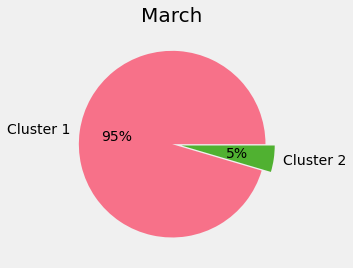

In [61]:
count=march['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
cluster_name=['Cluster 1','Cluster 2']
explode = [0, 0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
plt.title('March',fontsize=20)
# displaying chart
plt.show()

In [62]:
march['tweet'][102]

'Karnataka had a total of 580 fresh #Covid_19 cases &amp; 5 deaths on Saturday. Bengaluru had 367 new  cases &amp; 3 deaths. Total tests 82229 +vty rate 0.70%. Overall covid deaths in State so far: 12359 Blr: 4496  @ChitraSundaram7 @scooban @Amit_A_Tiwari @dr_asr @SunithaNahar @sun_usind'